# Data Exploration

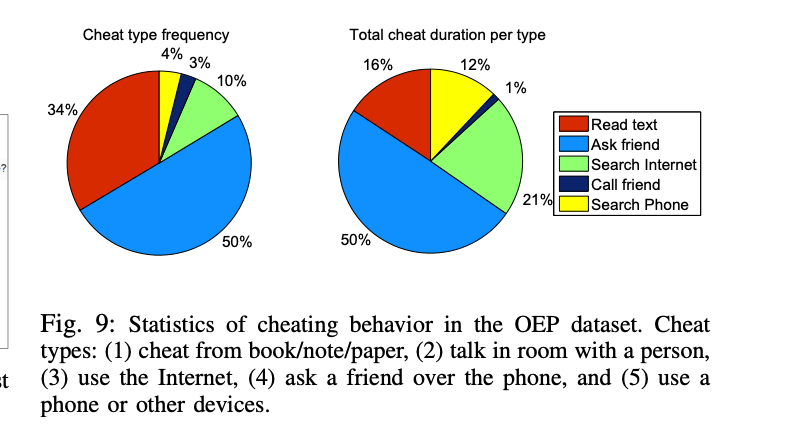

In [37]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import librosa
import librosa.display
from datetime import datetime

In [ ]:
CHEATING_TYPE = {
    1
}

## 1. Video Data Exploration
Display a specific frame

In [38]:
def explore_video_timeframe(video_path, start_time, end_time):
    # Convert start and end times from mm:ss to total seconds for easier calculation
    start_total_seconds = int(datetime.strptime(start_time, '%M:%S').strftime('%M')) * 60 + int(datetime.strptime(start_time, '%M:%S').strftime('%S'))
    end_total_seconds = int(datetime.strptime(end_time, '%M:%S').strftime('%M')) * 60 + int(datetime.strptime(end_time, '%M:%S').strftime('%S'))

    # Initialize video capture
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)  # Get frames per second of the video

    # Calculate start and end frames
    start_frame = int(fps * start_total_seconds)
    end_frame = int(fps * end_total_seconds)

    # Set the starting frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)

    # Read and display frames from start to end
    current_frame = start_frame
    while current_frame <= end_frame:
        success, frame = cap.read()
        if not success:
            break  # Break the loop if unable to read more frames

        # Convert BGR to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 6))
        plt.imshow(frame_rgb)
        plt.title(f'Frame at {current_frame}th position')
        plt.axis('off')
        plt.show()

        current_frame += int(fps)  # Skip to next second or adjust as needed for finer granularity

    cap.release()


In [42]:
target_dir = '/Users/sarmkunatham/Desktop/1. Projects/GithubCodes/CU_Work/senior_project/exam_phase/dataset/OEP_database'
video_name = 'subject8/vaibhav1.avi'
video_path = os.path.join(target_dir, video_name)

explore_video_timeframe(video_path, '0019', '0022')

ValueError: time data '0019' does not match format '%M:%S'

## 2. Audio Data Exploration
load an audio file, plots its waveform, and generates a spectogram

In [21]:
def explore_audio(audio_path):
    audio, sr = librosa.load(audio_path)
    
    # Plot the waveform
    time = np.linspace(0, len(audio) / sr, num=len(audio))
    
    plt.figure(figsize=(10, 4))
    plt.plot(time, audio)
    plt.title('Audio Waveform')
    plt.ylabel('Amplitude')
    plt.xlabel('Time (s)')
    plt.show()
    
    # Generate and display the spectogram
    plt.figure(figsize=(10, 4))
    X = librosa.stft(audio)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectogram')
    plt.show()

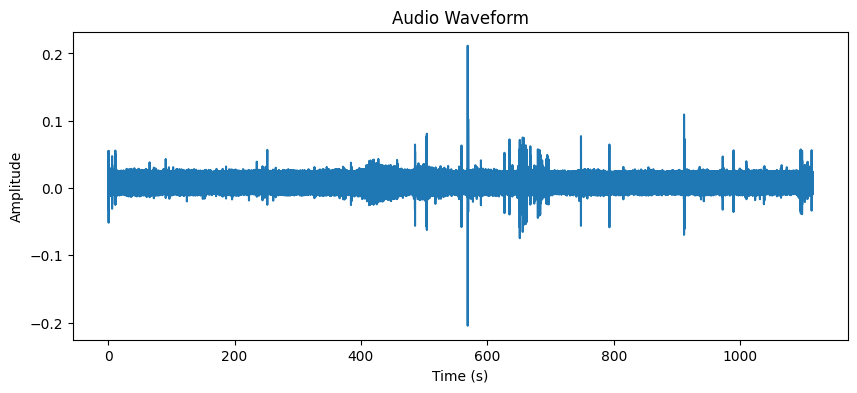

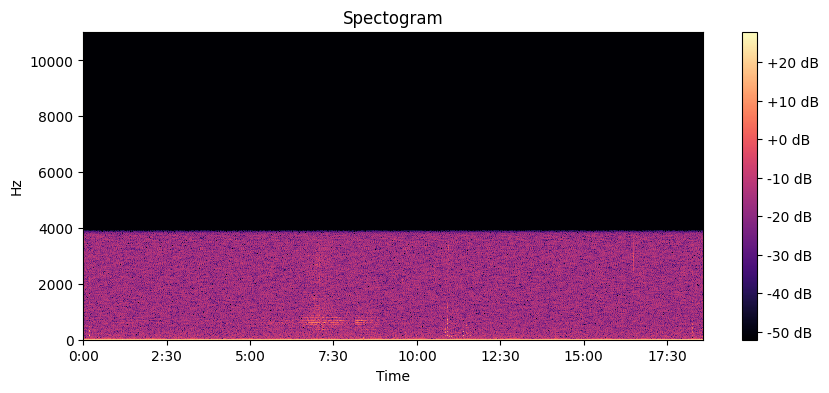

In [23]:
target_dir = '/Users/sarmkunatham/Desktop/1. Projects/GithubCodes/CU_Work/senior_project/exam_phase/dataset/OEP_database'
audio_name = 'subject8/vaibhav.wav'
audio_path = os.path.join(target_dir, audio_name)

explore_audio(audio_path)

## 3. Ground truth data exploration

In [34]:
def analyze_ground_truth_mmss(gt_path):
    # Load the ground truth data
    gt_data = pd.read_csv(gt_path, sep='\s+', names=['Start', 'End', 'CheatingType'], header=None)
    
    # Convert mmss to a more usable format
    gt_data['Start'] = pd.to_datetime(gt_data['Start'], format='%M%S').dt.time
    gt_data['End'] = pd.to_datetime(gt_data['End'], format='%M%S').dt.time

    # Display the first few rows to verify correct loading
    print(gt_data)

    # Count the number of instances for each cheating type
    cheating_counts = gt_data['CheatingType'].value_counts().sort_index()
    
    # Plot the counts
    plt.figure(figsize=(10, 6))
    sns.barplot(hue=cheating_counts.index, y=cheating_counts.values, palette="viridis", legend=False)
    plt.title('Frequency of Cheating Types')
    plt.xlabel('Cheating Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


       Start       End  CheatingType
0   00:01:09  00:02:02             3
1   00:02:08  00:03:02             3
2   00:11:02  00:10:19             3
3   00:12:05  00:13:01             3
4   00:13:02  00:13:09             3
5   00:14:07  00:14:08             3
6   00:15:00  00:15:02             3
7   00:20:00  00:21:01             3
8   00:21:04  00:22:07             3
9   00:25:02  00:25:06             3
10  00:25:08  00:30:08             3
11  00:31:05  00:31:07             3
12  00:35:04  00:35:08             1
13  00:35:09  00:41:04             1
14  00:09:20  00:09:22             1
15  00:09:24  00:09:29             1
16  00:09:30  00:09:54             1
17  00:10:50  00:11:10             2
18  00:11:14  00:11:37             2
19  00:12:39  00:12:54             1
20  00:12:55  00:13:02             1
21  00:13:05  00:13:07             1
22  00:13:09  00:13:11             1
23  00:13:26  00:13:27             1
24  00:15:29  00:15:33             1
25  00:18:15  00:18:19             2
2

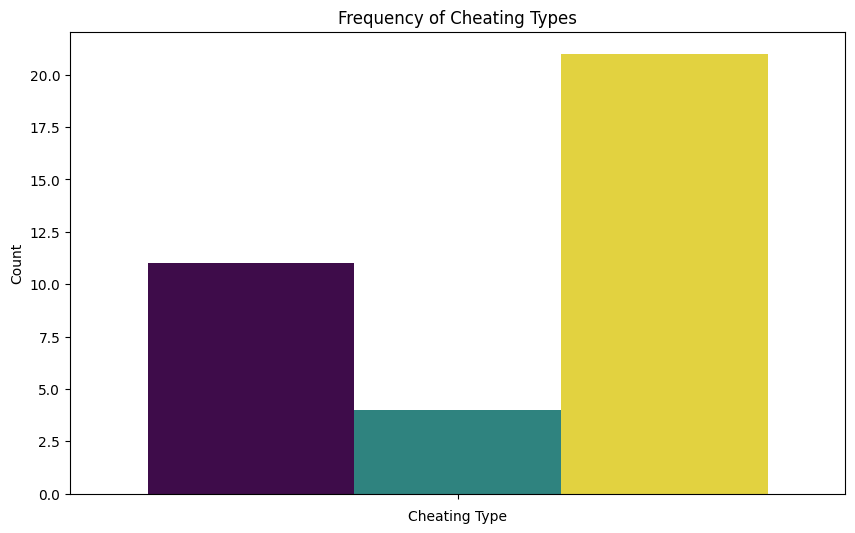

In [35]:
target_dir = '/Users/sarmkunatham/Desktop/1. Projects/GithubCodes/CU_Work/senior_project/exam_phase/dataset/OEP_database'
gt_name = 'subject8/gt.txt'
gt_path = os.path.join(target_dir, gt_name)

analyze_ground_truth_mmss(gt_path)